# PROJET DE SESSION
## ÉQUIPE J

 - Notre projet se base sur une analyse de **l'endettement des étudiants de différents niveaux( collégial, baccalauréat,...)** avec des données tirées de **Statistique Canada**
 - Ci-dessous se trouve l'analyse faite à travers les différentes questions posées

## Code pour Extraction des données sur Statistique Canada

In [38]:
import requests 
import zipfile 
import io 

url = 'https://www150.statcan.gc.ca/n1/fr/tbl/csv/37100038-fra.zip?st=W3yJpysh'#le lien du site pour la base de donnée
r = requests.get(url)#obtenir le fichier

with zipfile.ZipFile(io.BytesIO(r.content), 'r') as z:#c'est un dossier compressé avec deux docs, donc on doit le dézipper
    f = z.open(z.namelist()[0])#puis ouvrir le premier fichier
    table = pd.read_csv(f, sep = ';')#on lit ensuite le fichier, le délimiteur étant un ;

## Analyse des données

### Question 1 : Quel est le niveau d'étude ayant le plus haut taux d'endettement?
 - On a regroupé les données de  dette moyenne, salaire moyen et de ratio de dette par rapport au salaire selon l'année et selon le niveau d'étude; ainsi grâce à ce tableau on arrive à determiner le niveau d'étude ayant le plus grand endettement.
 - À travers cette question on pourra savoir quel type d'étudiant s'endette le plus pour ses études et on voit qu'en général les **doctorants** ont la dettte moyenne la plus élévée sauf en 2002 au profit des bacheliers car en effet le doctorat est le plus coûteux en terme de scolarité.
 - le **ratio de dette par rapport au salaire** est toujours le plus élévé pour les étudiants au baccalauréat notamment dû au fait que leur salaire est beaucoup plus faible mais leur montant de dette un peu faible par rapport aux étudiants du doctorat.
 - **Ce ratio est notamment décroissant** à travers les années pour tous les niveaux sauf pour le doctorat mais **le montant de dette moyenne est croissant** à travers les années quant à lui.On peut comprendre ces deux évolutions dans le sens où plus les années passe plus le salaire augemente donc le ratio à tendance à décroitre mais inversement plus les années passe plus on a tendance à s'endetter pour différents projets d'où la croissance de la dette moyenne.

    Année        Niveau  Dette moyenne  Salaire moyen  Ratio
0    2000     Collégial        12500.0        26800.0   0.47
1    2000  Baccalauréat        19600.0        33500.0   0.59
2    2000      Maîtrise        18400.0        41600.0   0.44
3    2000      Doctorat        18900.0        57400.0   0.33
4    2005     Collégial        12700.0        30200.0   0.42
5    2005  Baccalauréat        19600.0        39700.0   0.49
6    2005      Maîtrise        19000.0        46800.0   0.41
7    2005      Doctorat        22900.0        55100.0   0.42
8    2010     Collégial        14000.0        38400.0   0.36
9    2010  Baccalauréat        22300.0        49700.0   0.45
10   2010      Maîtrise        20600.0        60800.0   0.34
11   2010      Doctorat        23200.0        86900.0   0.27
12   2015     Collégial        14200.0        38000.0   0.37
13   2015  Baccalauréat        23000.0        51000.0   0.45
14   2015      Maîtrise        20000.0        59000.0   0.34
15   2015      Doctorat 

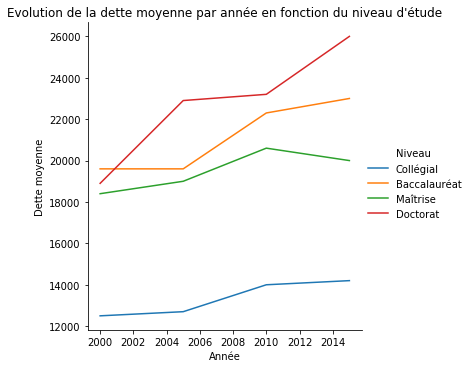

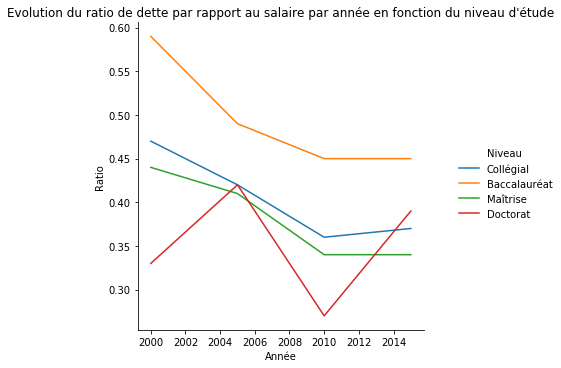

In [52]:
#Code pour création du dataframe permettant l'analyse
import requests#Tous les modules nécessaires au code 
import zipfile 
import io
import pandas as pd 
import seaborn as sns 

la=[]# Pour faire la mise en page de ce code, je sépare les éléments dans leurs listes respectives, puis je les recombine dans un dataframe
ln=[]#ce sont toutes les listes dont j'ai besoin: année, niveau, dette, salaire, ratio
ld=[]
ls=[]
lr=[]
i=0#j'utilise une boucle while et ceci est mon incrémenteur

url = 'https://www150.statcan.gc.ca/n1/fr/tbl/csv/37100038-fra.zip?st=W3yJpysh'#code pour récupérer les données
r = requests.get(url)#

with zipfile.ZipFile(io.BytesIO(r.content), 'r') as z:
    f = z.open(z.namelist()[0])
    table = pd.read_csv(f, sep = ';')

#on localise uniquement les revenus et les dettes du Canada , puis on enlève les colonnes superflus
table= table.loc[table['GÉO'].isin(['Canada'])].loc[table["Statistique"].isin(["Revenu personnel moyen au cours de l'année précédant l'interview", "Montant moyen de la dette contractée au moment de l'obtention du diplôme"])]
table.drop(["DGUID", "UNITÉ DE MESURE","IDENTIFICATEUR D'UNITÉ DE MESURE","FACTEUR SCALAIRE","IDENTIFICATEUR SCALAIRE","VECTEUR","COORDONNÉES","STATUS","SYMBOLE","TERMINÉ","DÉCIMALES","GÉO"], axis=1, inplace=True)

while i<len(table):#pendant que nous sommes dans la liste
    if i%2==0:# si l'index de la rangée est pair (revenu personnel)
        ld.append(table.iloc[i,3])#on ajoute a la liste la dette
        la.append(table.iloc[i,0])#on ajoute a la liste l'année
        ln.append(table.iloc[i,1])# on ajoute le niveau

    else:#si l'indice et impair
        ls.append(table.iloc[i,3])#on ajoute le salaire
        lr.append(round(table.iloc[(i-1),3]/table.iloc[i,3],2))#on ajoute le ratio, calculé à partir des deux chiffres trouvés précédemment
    i+=1#on incrémente

liste= {'Année':la,'Niveau':ln,'Dette moyenne':ld,'Salaire moyen':ls, 'Ratio':lr}# on transforme les 4 listes en un dictionnaire de listes
DF = pd.DataFrame.from_dict(liste)#on transformele dictionnaire en data frame
print(DF)
#Graphique donnant l'evolution de la dette moyenne par année en fonction du niveau d'étude
graph1=sns.relplot(kind='line',x='Année' , y='Dette moyenne',hue='Niveau', data=DF)
graph1.set(title="Evolution de la dette moyenne par année en fonction du niveau d'étude")
graph1
#Graphique donnant l'evolution du ratio de dette par rapport au salaire par année en fonction du niveau d'étude
graph2=sns.relplot(kind='line',x='Année' , y='Ratio',hue='Niveau', data=DF)
graph2.set(title="Evolution du ratio de dette par rapport au salaire par année en fonction du niveau d'étude")
graph2

### Question 2 : Est-ce que la dette moyenne d'un étudiant  a augmenté en fonction de son salaire annuel?
- Pour effectuer notre analyse, on a regroupé les données de façon à avoir la dette moyenne,le salaire moyen et le ratio de dette par salaire en fonction des années(par saut de 5 ans); ce qui va nous permettre de visualiser l'évolution de la dette par rapport à l'évolution du salaire.
- Ici on remarque que les étudiants ont tendance à augmenter leur endettement quand leur salaire augmente, un constat qui confirme nos résultats de la question 1, et donc on peut dire que cela est dû au fait que lorsqu'on gagne plus,on a envie plus et nos charges augmentent et on s'endettent de façon à pouvoir atteindre nos objectifs tout en ayant un bon niveau de vie.Les graphes ci-dessous illustrent bien cela.

       Dette moyenne  Salaire moyen  Ratio
Année                                     
2000         16567.0        32070.0   0.52
2005         17318.0        37609.0   0.46
2010         19273.0        48156.0   0.40
2015         19589.0        48014.0   0.41


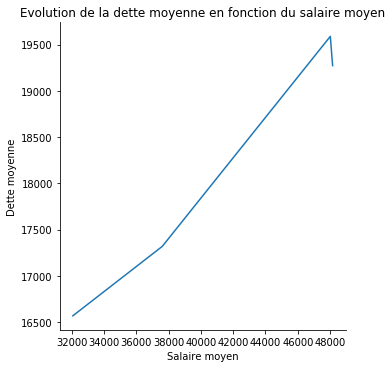

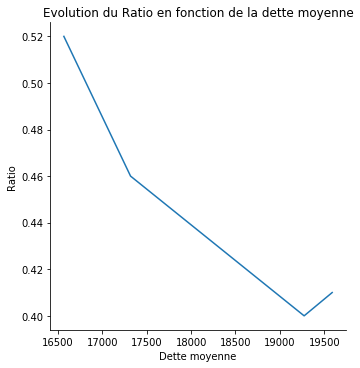

In [54]:
import requests 
import zipfile 
import io 
import pandas as pd 
import seaborn as sns 

la=[]#listes années, niveau d'éduc., dettes moy, salaire moy, ratio
le=[]
ld=[]
ls=[]
lr=[]
ln=[]
ba=[]
bd=[]
bs=[]
br=[]
i=0
j=0
a=0

url = 'https://www150.statcan.gc.ca/n1/tbl/csv/37100038-fra.zip'
r = requests.get(url)

with zipfile.ZipFile(io.BytesIO(r.content), 'r') as z:
    f = z.open(z.namelist()[0])
    table = pd.read_csv(f, sep = ';')

#Mêmes étapes que le numéro plus haut, mais on ajoute aussi le nombre de gens, pour pouvoir grouper de manière proportionnel
table= table.loc[table['GÉO'].isin(['Canada'])].loc[table["Statistique"].isin(["Nombre de diplômés","Revenu personnel moyen au cours de l'année précédant l'interview", "Montant moyen de la dette contractée au moment de l'obtention du diplôme"])]
table.drop(["DGUID", "UNITÉ DE MESURE","IDENTIFICATEUR D'UNITÉ DE MESURE","FACTEUR SCALAIRE","IDENTIFICATEUR SCALAIRE","VECTEUR","COORDONNÉES","STATUS","SYMBOLE","TERMINÉ","DÉCIMALES","GÉO"], axis=1, inplace=True)
table
while i<len(table):#même chose que en haut, mais maintenant, nous avons 3 valeurs differentes pour chaque groupe, donc c'est modulo 3
    if i%3==1:#
        ld.append(table.iloc[i,3])# on ajoute le niveau de dette
        la.append(table.iloc[i,0])#l'année
        le.append(table.iloc[i,1])#le niveau d'étude

    elif i%3==2:
        ls.append(table.iloc[i,3])#on ajoute le salaire
        lr.append(round(table.iloc[(i-1),3]/table.iloc[i,3],2))# on calcule le ratio
    else:
        ln.append(int(table.iloc[i,3]))#le nomre de diplomé
    i+=1

liste= {'Année':la,'Niveau':le,'Dette moyenne':ld,'Salaire moyen':ls, 'Ratio':lr, 'Nombre': ln}# on transforme les 4 listes en un dictionnaire de listes
DF=pd.DataFrame.from_dict(liste)#on transformele dictionnaire en data frame
while j<len(DF):#Pendant qu'on est dans la liste
    if j%4==3:#ici, on fait un groupage de maniere proportionnelle en faisant la somme produit du nombre de diplomés avec leurs dettes et salaires
        a+=DF.iloc[j,5]#a est une variable utilisé pour calculé la somme. Il faut faire la moyenne par bloc de 4
        ba.append(DF.iloc[j,0])
        bd.append(round((DF.iloc[j-3,2]*DF.iloc[j-3,5]+DF.iloc[j-2,2]*DF.iloc[j-2,5]+DF.iloc[j-1,2]*DF.iloc[j-1,5]+DF.iloc[j,2]*DF.iloc[j,5])/a))
        bs.append(round((DF.iloc[j-3,3]*DF.iloc[j-3,5]+DF.iloc[j-2,3]*DF.iloc[j-2,5]+DF.iloc[j-1,3]*DF.iloc[j-1,5]+DF.iloc[j,3]*DF.iloc[j,5])/a))
        br.append(round(bd[-1]/bs[-1],2))
        a=0#On recommence à 0 pour réadditionner
        j+=1#incrémenteur
    else:
        a+=DF.iloc[j,5]#on additionne le nombre total de gens pour ensuite diviser par le total pour trouver la moyenne
        j+=1

liste2= {'Année':ba,'Dette moyenne':bd,'Salaire moyen':bs, 'Ratio':br}# on transforme les 4 listes en un dictionnaire de listes
DFgroup=pd.DataFrame.from_dict(liste2)#on transformele dictionnaire en data frame
DFgroup.set_index('Année', inplace=True)#on définit l'année comme index
print(DFgroup)

#Graphique donnant l'evolution de la dette moyenne en fonction du salaire moyen
graph1=sns.relplot(kind='line',y='Dette moyenne' , x='Salaire moyen',data=DFgroup)
graph1.set(title="Evolution de la dette moyenne en fonction du salaire moyen")
graph1
#Graphique donnant l'evolution du Ratio en fonction de la dette moyenne
graph2=sns.relplot(kind='line',x='Dette moyenne' , y='Ratio',data=DFgroup)
graph2.set(title="Evolution du Ratio en fonction de la dette moyenne")
graph2

### Question 3 :Est-ce qu'il y a une corrélation entre avoir des enfants et être marié avec le taux d'endettement?
- On a calculé ici **le coefficient de corrélation** entre le fait d'avoir des enfants ou le mariage avec le taux d'endettement pour les différentes provinces. Et en général, le coefficient de corrélation est proche de 0 quelque soit la province, ce qui signifie **qu'il ne semble pas avoir de lien** entre entre le fait d'avoir des enfants ou le mariage avec le taux d'endettement. Ici, ce n'est pas le premier tableau qui est important, mais plutot les calculs de corrélation ensuite

In [9]:
import requests #Le début du code est similaire aux derniers
import pandas as pd 
import seaborn as sns 
import zipfile 
import io 
import numpy as np
ln=[]
ld=[]
le=[]
lm=[]
lg=[]
la=[]
lb=[]

i=0

url = 'https://www150.statcan.gc.ca/n1/tbl/csv/37100038-fra.zip'
r = requests.get(url)

with zipfile.ZipFile(io.BytesIO(r.content), 'r') as z:
    #print(z.namelist())
    f = z.open(z.namelist()[0])
    table = pd.read_csv(f, sep = ';')


table= table.loc[table["Statistique"].isin(["Nombre de diplômés","Pourcentage des diplômés ayant contracté une dette importante au moment de l'interview (25 000 $ et plus)", "Marié ou en union libre", "Ayant des enfants à charge"])]
table.drop(["DGUID", "UNITÉ DE MESURE","IDENTIFICATEUR D'UNITÉ DE MESURE","FACTEUR SCALAIRE","IDENTIFICATEUR SCALAIRE","VECTEUR","COORDONNÉES","STATUS","SYMBOLE","TERMINÉ","DÉCIMALES"], axis=1, inplace=True)

while i<len(table):# on refait de le même principe pour les séparer en liste, mais cette fois-ci, on ajoute une contrainte pour enlever toutes les rangées ou il y a un NaN pour calculer une corrélation ensuite
    if i%4==0:
        if np.isnan(table.iloc[i,4])==True:#ça dépend de l'emplacement du chiffre, tout dépendamment, il faut soit incrémenter de manière à sauter les prochaines lignes
            i+=4
        else:
            ln.append((table.iloc[i,4]))
            i+=1
            
    elif i%4==1:
        if np.isnan(table.iloc[i,4])==True:#et/ou enlever les lignes que nous avions ajouté précédemment
            ln.pop()
            i+=3

        else:
            ld.append((table.iloc[i,4]))
            i+=1
     
    elif i%4==2:
        if np.isnan(table.iloc[i,4])==True:
            ln.pop()
            ld.pop()
            i+=2
        else:
            lm.append((table.iloc[i,4]))
            i+=1
    else:
        if np.isnan(table.iloc[i,4])==True:
            ln.pop()
            ld.pop()
            lm.pop()
            i+=1

        else:
            le.append((table.iloc[i,4]))
            lg.append((table.iloc[i,1]))#ici, si aucun chiffre n'était NaN, alors on ajoute aussi le niveau d'éducation, la géo, et l'année
            la.append((table.iloc[i,0]))
            lb.append((table.iloc[i,2]))


            i+=1
#Tableau dont on a besoin pour bien déterminer nos coefficients de corrélation
liste= {'Mariage': lm,'Enfants':le,'Pourcentage Dette':ld, 'Valeur':ln, 'Géo':lg, 'Année':la, 'Niveau': lb}# on transforme les 4 listes en un dictionnaire de listes
DF=pd.DataFrame.from_dict(liste)#on transformele dictionnaire en data frame
DF

,Mariage,Enfants,Pourcentage Dette,Valeur,Géo,Année,Niveau
0,37.0,27.0,6.0,30800.0,Canada,2000,Collégial
1,38.0,17.0,22.0,35400.0,Canada,2000,Baccalauréat
2,51.0,23.0,21.0,8000.0,Canada,2000,Maîtrise
3,68.0,41.0,22.0,1400.0,Canada,2000,Doctorat
4,28.0,19.0,13.0,700.0,Terre-Neuve-et-Labrador,2000,Collégial
5,34.0,11.0,50.0,800.0,Terre-Neuve-et-Labrador,2000,Baccalauréat
6,36.0,10.0,27.0,100.0,Terre-Neuve-et-Labrador,2000,Maîtrise
7,30.0,24.0,8.0,400.0,Île-du-Prince-Édouard,2000,Collégial
8,48.0,20.0,27.0,100.0,Île-du-Prince-Édouard,2000,Baccalauréat
9,31.0,30.0,5.0,1300.0,Nouvelle-Écosse,2000,Collégial


In [6]:
#Fonction de Calcul des Corrélations
def macorrelation(proportion1 , proportion2 , nbpersonnes ):

    variance1 = (((proportion1*nbpersonnes)*(proportion1*nbpersonnes))/nbpersonnes) - proportion1
    variance2 = ((proportion2*nbpersonnes)*(proportion2*nbpersonnes))/nbpersonnes - proportion2

    covariance = (((proportion1*nbpersonnes)*(proportion2*nbpersonnes))/nbpersonnes)-(proportion1*proportion2)

    correlation = (covariance/(((variance1)**(0.5))*((variance2)**(0.5)))-1)

    return(correlation)

In [7]:
#Calcul des correlation selon la zone sur toutes les périodes

province = input("Quelle province voulez vous considérer?")

totalm=0 #total des personnes interviewées au Canada, sur toutes les périodes, présentant le caractère "enfant" 
totaln=0 #total des personnes interviewées au Canada, sur toutes les périodes, présentant le caractère "enfant"
totald=0 #total des personnes interviewées au Canada, sur toutes les périodes, présentant le caractère "dette élevée"
somme=0 #total des personnes interviewées au Canada, sur toutes les périodes.

for i in range(0, len(DF)):
    if DF["Géo"][i] == province :
        totalm= totalm + (DF["Mariage"][i]/100)*DF["Valeur"][i]
        totaln= totaln + (DF["Enfants"][i]/100)*DF["Valeur"][i]
        totald= totald + (DF["Pourcentage Dette"][i]/100)*DF["Valeur"][i]
        somme = somme +  DF["Valeur"][i]
        
proportionm = totalm / somme #proportion des personnes interviewées au Canada, sur toutes les périodes, présentant le caractère "enfant"
proportionn = totaln / somme #proportion des personnes interviewées au Canada, sur toutes les périodes, présentant le caractère "enfant"
proportiond = totald / somme #proportion des personnes interviewées au Canada, sur toutes les périodes, présentant le caractère "dette élevée"

correlationm = macorrelation(proportion1 = proportionm , proportion2 = proportiond , nbpersonnes = somme)
correlationn = macorrelation(proportion1 = proportionn , proportion2 = proportiond , nbpersonnes = somme)

print("Selon notre base de donnée, la correlation entre le fait d'être marié et le fait de detenir une dette élévée après ses études est de {0} au/en {1}.\n".format(correlationm.round(7), province))
print("Selon notre base de donnée, la correlation entre le fait d'avoir un enfant et le fait de detenir une dette élévée après ses études est de {0} au/en {1}.".format(correlationn.round(7), province))

Quelle province voulez vous considérer?Colombie-Britannique
Selon notre base de donnée, la correlation entre le fait d'être marié et le fait de detenir une dette élévée après ses études est de 6.28e-05 au/en Colombie-Britannique.

Selon notre base de donnée, la correlation entre le fait d'avoir un enfant et le fait de detenir une dette élévée après ses études est de 9.42e-05 au/en Colombie-Britannique.


 ### Question 4 :De quelle province proviennent les finissants les plus endettés?
- Pour notre analyse, on a regroupé dans un tableau les données de façon à avoir la dette moyenne en fonction de chaque province pour l'ensemble des étudiants de la province donnée, ce qui nous permettra de savoir dans quel province on a les étudiants les plus endettés grâce au montant de dette moyen par province
- Notre analyse nous amène à constater que c'est au **New-Brunswick** qu'on a la plus grande proportion de dette en moyenne et inversement on remarque qu'au **Québec** l'endettement moyen est le plus faible, ces résultats s'expliquent soit par le niveau de vie de ces provinces oubien c'est juste une attitude caractéristique des populations des provinces

                   Province  Dette moyenne  Proportion (%)
0                    Canada          23000              26
1   Terre-Neuve-et-Labrador          22000              30
2     Île-du-Prince-Édouard          32000              48
3           Nouvelle-Écosse          31000              45
4         Nouveau-Brunswick          35000              55
5                    Québec          11900               4
6                   Ontario          24000              27
7                  Manitoba          20000              18
8              Saskatchewan          28000              43
9                   Alberta          30000              43
10     Colombie-Britannique          28000              38


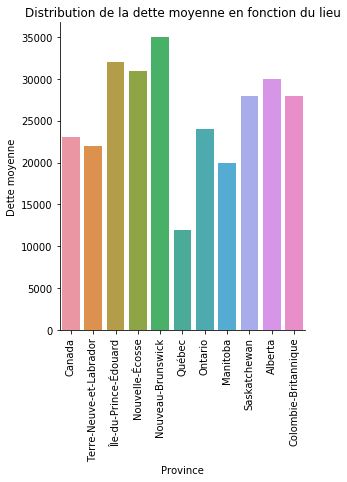

In [56]:
import requests #même début que les autres numéros
import pandas as pd 
import seaborn as sns 
import zipfile 
import io 
import matplotlib.pyplot as plt

la=[]
lr=[]
lm=[]
lp=[]
i=0

url = 'https://www150.statcan.gc.ca/n1/tbl/csv/37100038-fra.zip'
r = requests.get(url)

with zipfile.ZipFile(io.BytesIO(r.content), 'r') as z:
    f = z.open(z.namelist()[0])
    table = pd.read_csv(f, sep = ';')


table= table.loc[table['PÉRIODE DE RÉFÉRENCE'].isin(['2015'])].loc[table["Niveau d'études"].isin(['Baccalauréat'])].loc[table["Statistique"].isin(["Pourcentage des diplômés ayant contracté une dette importante au moment de l'interview (25 000 $ et plus)", "Montant moyen de la dette contractée au moment de l'obtention du diplôme"])]
table.drop(["DGUID", "UNITÉ DE MESURE","IDENTIFICATEUR D'UNITÉ DE MESURE","FACTEUR SCALAIRE","Niveau d'études","IDENTIFICATEUR SCALAIRE","VECTEUR","COORDONNÉES","STATUS","SYMBOLE","TERMINÉ","DÉCIMALES"], axis=1, inplace=True)

while i<len(table):
    if i%2==0:
        lm.append(int(table.iloc[i,3]))
        la.append(table.iloc[i,0])
        lr.append(table.iloc[i,1])

    else:
        lp.append(int(table.iloc[i,3]))
    i+=1

liste= {'Province':lr,'Dette moyenne':lm,'Proportion (%)':lp}# on transforme les 4 listes en un dictionnaire de listes
DF=pd.DataFrame.from_dict(liste)#on transformele dictionnaire en data frame
print(DF)
#Graphique donnant la distribution de la dette moyenne en fonction du lieu
graph=sns.catplot(kind='bar', x='Province', y='Dette moyenne', data=DF)
[plt.setp(ax.get_xticklabels(), rotation=90) for ax in graph.axes.flat]#on change l'orientation des titres pour l'axe des x
graph.set(title="Distribution de la dette moyenne en fonction du lieu")# on y ajoute le titre
graph